# **Импорт библиотек и загрузка изображений**

In [1]:
import numpy as np
import pandas as pd
from numba import jit, cuda 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.debugging.set_log_device_placement(True)

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


In [9]:
from tensorflow.keras.preprocessing.image import load_img

ImportError: cannot import name '_initialize_variables' from 'keras.src.backend' (c:\Users\dj_ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\__init__.py)

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

NameError: name 'load_img' is not defined

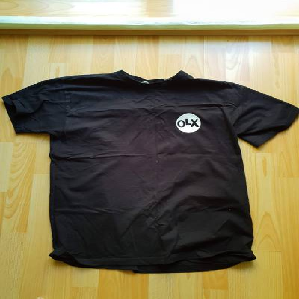

In [8]:
load_img(fullname, target_size=(299, 299))

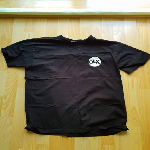

In [9]:
load_img(fullname, target_size=(150, 150))

In [10]:
from tensorflow.keras.applications.xception import Xception #импорт фактической модели
from tensorflow.keras.applications.xception import preprocess_input #функция подготовки изображения к использованию моделью
from tensorflow.keras.applications.xception import decode_predictions # функция для декодирования предсказания модели

In [11]:
model = Xception(
    weights='imagenet', #предварительно обученная модель ImageNet
    input_shape=(299, 299, 3)
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in

In [12]:
img = load_img(fullname, target_size=(299, 299)) # массив формы изображения
x = np.array(img)
x.shape

(299, 299, 3)

In [13]:
X = np.array([x]) #массив и количество изображений
X.shape

(1, 299, 299, 3)

# **Получение прогнозов **

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDatas

In [16]:
pred.shape

(1, 1000)

In [17]:
pred[0, :10]

array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

In [18]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.681963),
  ('n02916936', 'bulletproof_vest', 0.038140036),
  ('n04370456', 'sweatshirt', 0.034324806),
  ('n03710637', 'maillot', 0.011354225),
  ('n04525038', 'velvet', 0.0018453608)]]

# **Сверточные слои **

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
image_size = (150, 150)
batch_size = 32

In [21]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [22]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

base_model.trainable = False

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in d

In [24]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vector)

model = keras.Model(inputs, outputs)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device

In [25]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in

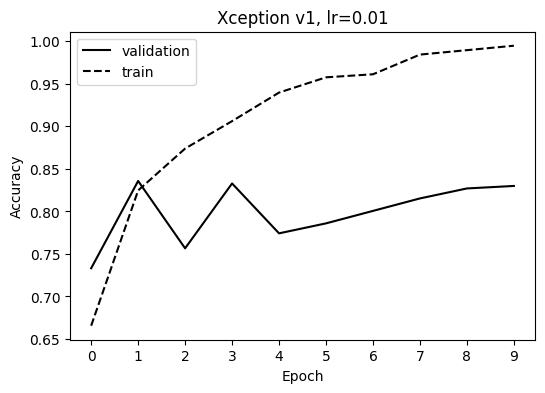

In [ ]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('xception_v1_0_01.svg')

plt.show()

In [ ]:
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vector)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [1]:
model = make_model(learning_rate=0.001)
history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds)

NameError: name 'make_model' is not defined

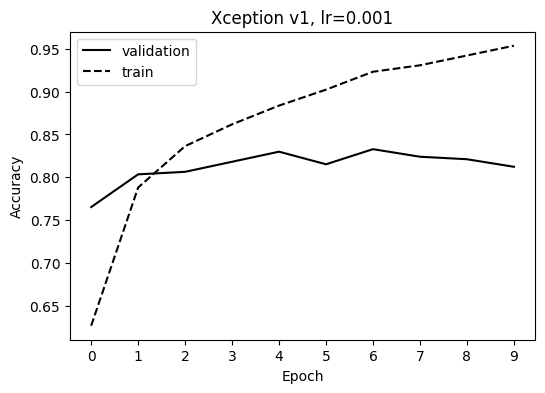

In [ ]:
plt.figure(figsize=(6, 4))

epochs = history_0_001.epoch
val = history_0_001.history['val_accuracy']
train = history_0_001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('xception_v1_0_001.svg')

plt.show()

In [ ]:
model = make_model(learning_rate=0.0001)
history_0_0001 = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 12s 97ms/step - loss: 1.8287 - accuracy: 0.3970 - val_loss: 1.5225 - val_accuracy: 0.5191
Epoch 2/10
96/96 [==============================] - 8s 80ms/step - loss: 1.3451 - accuracy: 0.5772 - val_loss: 1.2213 - val_accuracy: 0.6276
Epoch 3/10
96/96 [==============================] - 8s 84ms/step - loss: 1.1261 - accuracy: 0.6470 - val_loss: 1.0598 - val_accuracy: 0.6745
Epoch 4/10
96/96 [==============================] - 8s 86ms/step - loss: 0.9972 - accuracy: 0.6741 - val_loss: 0.9598 - val_accuracy: 0.7038
Epoch 5/10
96/96 [==============================] - 8s 85ms/step - loss: 0.9079 - accuracy: 0.7005 - val_loss: 0.8905 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 8s 84ms/step - loss: 0.8427 - accuracy: 0.7210 - val_loss: 0.8402 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 8s 88ms/step - loss: 0.7920 - accuracy: 0.7392 - val_loss: 0.8013 - val_accuracy: 0.7625
Epoch 8/10
9

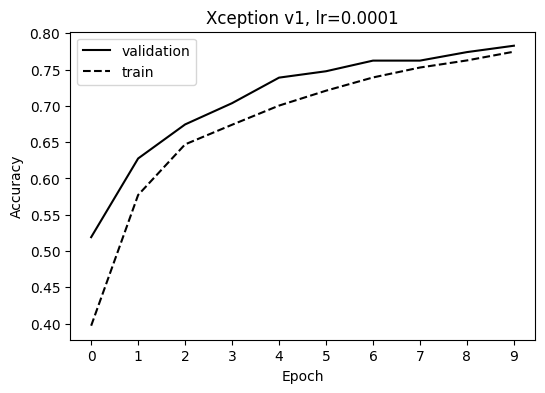

In [ ]:
plt.figure(figsize=(6, 4))

epochs = history_0_0001.epoch
val = history_0_0001.history['val_accuracy']
train = history_0_0001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.0001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('xception_v1_0_0001.svg')

plt.show()

In [ ]:
epochs = np.arange(10)
val_0_01 = history.history['val_accuracy']
val_0_001 = history_0_001.history['val_accuracy']
val_0_0001 = history_0_0001.history['val_accuracy']

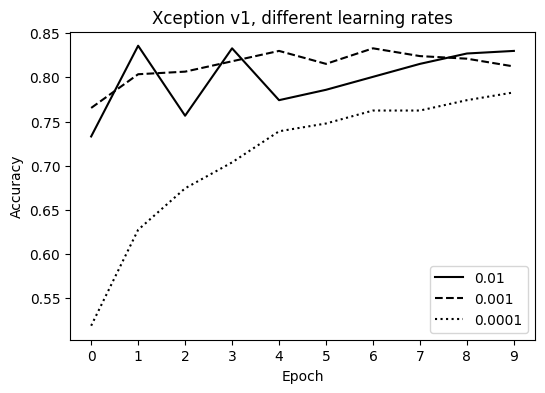

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_01, color='black', linestyle='solid', label='0.01')
plt.plot(epochs, val_0_001, color='black', linestyle='dashed', label='0.001')
plt.plot(epochs, val_0_0001, color='black', linestyle='dotted', label='0.0001')


plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

plt.savefig('xception_v1_all_lr.svg')

plt.show()

In [ ]:
model = make_model(learning_rate=0.001)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0931 - accuracy: 0.6314

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 12s 99ms/step - loss: 1.0931 - accuracy: 0.6314 - val_loss: 0.7173 - val_accuracy: 0.7859
Epoch 2/10
96/96 [==============================] - 9s 91ms/step - loss: 0.6232 - accuracy: 0.7823 - val_loss: 0.6355 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 8s 86ms/step - loss: 0.5005 - accuracy: 0.8334 - val_loss: 0.5822 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 9s 91ms/step - loss: 0.4236 - accuracy: 0.8605 - val_loss: 0.5668 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 9s 88ms/step - loss: 0.3661 - accuracy: 0.8875 - val_loss: 0.5700 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 8s 82ms/step - loss: 0.3208 - accuracy: 0.9087 - val_loss: 0.5528 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 9s 89ms/step - loss: 0.2876 - accuracy: 0.9221 - val_loss: 0.5731 - val_accuracy: 0.8006
Epoch 8/10
96/96 [=====

In [ ]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.0)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_0_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 13s 96ms/step - loss: 1.0061 - accuracy: 0.6555 - val_loss: 0.6238 - val_accuracy: 0.8035
Epoch 2/30
96/96 [==============================] - 9s 88ms/step - loss: 0.5345 - accuracy: 0.8119 - val_loss: 0.6220 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 9s 92ms/step - loss: 0.3690 - accuracy: 0.8768 - val_loss: 0.5531 - val_accuracy: 0.8182
Epoch 4/30
96/96 [==============================] - 8s 80ms/step - loss: 0.2685 - accuracy: 0.9182 - val_loss: 0.6511 - val_accuracy: 0.7801
Epoch 5/30
96/96 [==============================] - 8s 88ms/step - loss: 0.2059 - accuracy: 0.9439 - val_loss: 0.5883 - val_accuracy: 0.8035
Epoch 6/30
96/96 [==============================] - 9s 92ms/step - loss: 0.1476 - accuracy: 0.9612 - val_loss: 0.5648 - val_accuracy: 0.8299
Epoch 7/30
96/96 [==============================] - 8s 83ms/step - loss: 0.1047 - accuracy: 0.9788 - val_loss: 0.5828 - val_accuracy: 0.8152
Epoch 8/30
9

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_2_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_1 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 13s 99ms/step - loss: 1.0842 - accuracy: 0.6402 - val_loss: 0.6343 - val_accuracy: 0.7889
Epoch 2/30
96/96 [==============================] - 8s 88ms/step - loss: 0.6233 - accuracy: 0.7846 - val_loss: 0.5810 - val_accuracy: 0.8094
Epoch 3/30
96/96 [==============================] - 9s 90ms/step - loss: 0.4762 - accuracy: 0.8272 - val_loss: 0.5305 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 9s 93ms/step - loss: 0.3629 - accuracy: 0.8833 - val_loss: 0.5361 - val_accuracy: 0.8152
Epoch 5/30
96/96 [==============================] - 8s 88ms/step - loss: 0.2834 - accuracy: 0.9068 - val_loss: 0.5527 - val_accuracy: 0.7918
Epoch 6/30
96/96 [==============================] - 8s 84ms/step - loss: 0.2235 - accuracy: 0.9322 - val_loss: 0.5442 - val_accuracy: 0.8094
Epoch 7/30
96/96 [==============================] - 9s 91ms/step - loss: 0.1784 - accuracy: 0.9511 - val_loss: 0.5381 - val_accuracy: 0.8211
Epoch 8/30
9

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_5_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_2 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 13s 101ms/step - loss: 1.3132 - accuracy: 0.5717 - val_loss: 0.7844 - val_accuracy: 0.7713
Epoch 2/30
96/96 [==============================] - 9s 92ms/step - loss: 0.8242 - accuracy: 0.7177 - val_loss: 0.6468 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 8s 87ms/step - loss: 0.6914 - accuracy: 0.7595 - val_loss: 0.6277 - val_accuracy: 0.7918
Epoch 4/30
96/96 [==============================] - 8s 83ms/step - loss: 0.6138 - accuracy: 0.7875 - val_loss: 0.5938 - val_accuracy: 0.8006
Epoch 5/30
96/96 [==============================] - 9s 90ms/step - loss: 0.5184 - accuracy: 0.8204 - val_loss: 0.5928 - val_accuracy: 0.8094
Epoch 6/30
96/96 [==============================] - 8s 86ms/step - loss: 0.4637 - accuracy: 0.8432 - val_loss: 0.6024 - val_accuracy: 0.7859
Epoch 7/30
96/96 [==============================] - 8s 83ms/step - loss: 0.4150 - accuracy: 0.8579 - val_loss: 0.5348 - val_accuracy: 0.8035
Epoch 8/30


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.8)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_8_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_3 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
96/96 [==============================] - 12s 98ms/step - loss: 1.8095 - accuracy: 0.3853 - val_loss: 1.2474 - val_accuracy: 0.6276
Epoch 2/30
96/96 [==============================] - 9s 92ms/step - loss: 1.4857 - accuracy: 0.4866 - val_loss: 1.0447 - val_accuracy: 0.6628
Epoch 3/30
96/96 [==============================] - 8s 85ms/step - loss: 1.3256 - accuracy: 0.5290 - val_loss: 0.9285 - val_accuracy: 0.7302
Epoch 4/30
96/96 [==============================] - 8s 86ms/step - loss: 1.2709 - accuracy: 0.5362 - val_loss: 0.8737 - val_accuracy: 0.7625
Epoch 5/30
96/96 [==============================] - 8s 86ms/step - loss: 1.1909 - accuracy: 0.5707 - val_loss: 0.8065 - val_accuracy: 0.7537
Epoch 6/30
96/96 [==============================] - 9s 91ms/step - loss: 1.1350 - accuracy: 0.5909 - val_loss: 0.7338 - val_accuracy: 0.7683
Epoch 7/30
96/96 [==============================] - 9s 91ms/step - loss: 1.1199 - accuracy: 0.5962 - val_loss: 0.7393 - val_accuracy: 0.7859
Epoch 8/30
9

In [ ]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_1.history['accuracy']
train05 = history_2.history['accuracy']
train08 = history_3.history['accuracy']

val00 = history_0.history['val_accuracy']
val02 = history_1.history['val_accuracy']
val05 = history_2.history['val_accuracy']
val08 = history_3.history['val_accuracy']

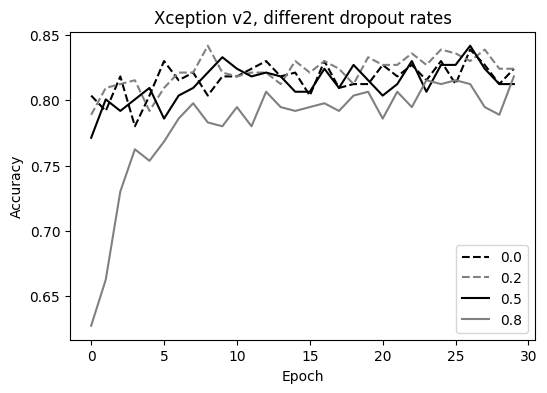

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, val02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, val05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, val08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout.svg')

plt.show()

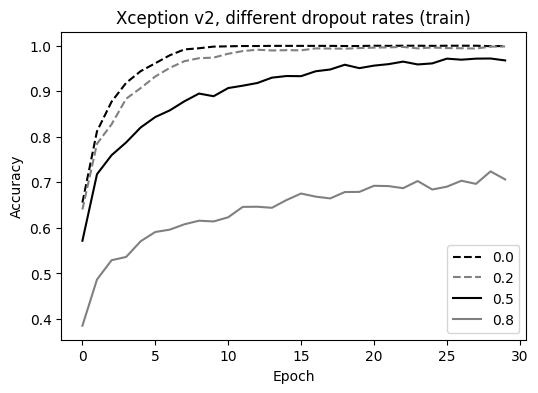

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, train08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout_train.svg')

plt.show()

In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

Epoch 1/50
96/96 [==============================] - 28s 256ms/step - loss: 1.1340 - accuracy: 0.6141 - val_loss: 0.6833 - val_accuracy: 0.7771
Epoch 2/50
96/96 [==============================] - 24s 248ms/step - loss: 0.7112 - accuracy: 0.7591 - val_loss: 0.5842 - val_accuracy: 0.7977
Epoch 3/50
96/96 [==============================] - 24s 246ms/step - loss: 0.5851 - accuracy: 0.8057 - val_loss: 0.5918 - val_accuracy: 0.7713
Epoch 4/50
96/96 [==============================] - 23s 243ms/step - loss: 0.5342 - accuracy: 0.8119 - val_loss: 0.5972 - val_accuracy: 0.7947
Epoch 5/50
96/96 [==============================] - 24s 250ms/step - loss: 0.4492 - accuracy: 0.8387 - val_loss: 0.5601 - val_accuracy: 0.8094
Epoch 6/50
96/96 [==============================] - 24s 247ms/step - loss: 0.4202 - accuracy: 0.8481 - val_loss: 0.6362 - val_accuracy: 0.8182
Epoch 7/50
96/96 [==============================] - 24s 248ms/step - loss: 0.3924 - accuracy: 0.8585 - val_loss: 0.5555 - val_accuracy: 0.8152

In [ ]:
epochs = history.epoch
accuracy = history.history['val_accuracy']

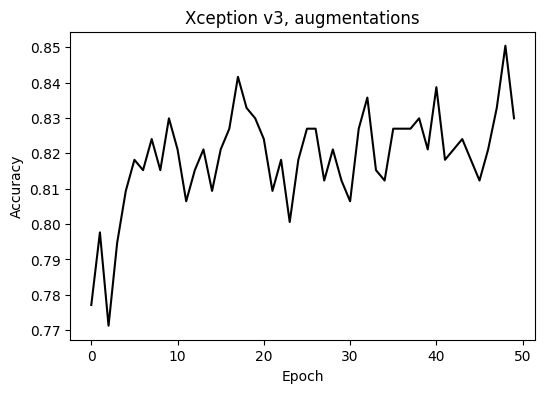

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, accuracy, color='black', linestyle='solid')


plt.title('Xception v3, augmentations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.savefig('xception_v3_aug.svg')

plt.show()

In [ ]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(299, 299, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(299, 299, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [ ]:
image_size = (299, 299)
batch_size = 32

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v4_large_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_l = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callbacks)

Epoch 1/20
96/96 [==============================] - 82s 794ms/step - loss: 0.7778 - accuracy: 0.7432 - val_loss: 0.4386 - val_accuracy: 0.8563
Epoch 2/20
96/96 [==============================] - 73s 761ms/step - loss: 0.4502 - accuracy: 0.8449 - val_loss: 0.4012 - val_accuracy: 0.8563
Epoch 3/20
96/96 [==============================] - 73s 763ms/step - loss: 0.3824 - accuracy: 0.8690 - val_loss: 0.4285 - val_accuracy: 0.8504
Epoch 4/20
96/96 [==============================] - 72s 754ms/step - loss: 0.3170 - accuracy: 0.8905 - val_loss: 0.3641 - val_accuracy: 0.8563
Epoch 5/20
96/96 [==============================] - 73s 756ms/step - loss: 0.3107 - accuracy: 0.8918 - val_loss: 0.3507 - val_accuracy: 0.8710
Epoch 6/20
96/96 [==============================] - 74s 768ms/step - loss: 0.2662 - accuracy: 0.9032 - val_loss: 0.3391 - val_accuracy: 0.8798
Epoch 7/20
96/96 [==============================] - 74s 766ms/step - loss: 0.2442 - accuracy: 0.9100 - val_loss: 0.3654 - val_accuracy: 0.8739

# **Augmentation next step **

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [4]:
image_size = (299, 299)

In [5]:
model = keras.models.load_model("xception_v2_0_8_{epoch:02d}_{val_accuracy:.3f}.h5")
#model = keras.models.load_model('xception_v4_large_08_0.894.h5')

OSError: ignored

In [6]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

FileNotFoundError: ignored

In [7]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

NameError: ignored

In [8]:
pred = model.predict(X)
pred[0]

NameError: ignored

In [ ]:
pred[0].argmax() # Определение классификации - брюки

4

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 349ms/step - loss: 0.2611 - accuracy: 0.9086


[0.26111942529678345, 0.9086021780967712]